In [1]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression with single feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
x = sp.Symbol('x')
y = 0.8 * x + 0.6
print("y = ", end='')
sp.pprint(y)


y = 0.8⋅x + 0.6


In [3]:
def ModelEquation(input):
    return 0.8*input+0.6

In [4]:
total_data_points = 50000
x = np.linspace(0, 2, total_data_points)
y = ModelEquation(x)

perm = np.random.permutation(len(x))
x = x[perm]
y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = ensure_column_vector(np.array(x[:training_numbers]))
training_labels = np.array(y[:training_numbers])

testing_attributes=ensure_column_vector(np.array(x[training_numbers:]))
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 1)
(7500, 1)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.01407289]]  bias  0.00027718775312558005 loss 2.126914902096937
Iteration  1000  weights  [[0.28124872]]  bias  0.22468387466384773 loss 0.8894672111723848
Iteration  2000  weights  [[0.45432465]]  bias  0.3694110463388618 loss 0.3720783254406027
Iteration  3000  weights  [[0.56654538]]  bias  0.4626282462584744 loss 0.15574667705123132
Iteration  4000  weights  [[0.63940746]]  bias  0.522549742060271 loss 0.06528770772188658
Iteration  5000  weights  [[0.68681096]]  bias  0.5609526660551671 loss 0.027456730165330904
Iteration  6000  weights  [[0.71774401]]  bias  0.5854518672771633 loss 0.011630109824788059
Iteration  7000  weights  [[0.7380187]]  bias  0.6009708451975477 loss 0.005004072469971683
Iteration  8000  weights  [[0.75139338]]  bias  0.6106928646649019 loss 0.002225327883838149
Iteration  9000  weights  [[0.76029849]]  bias  0.6166759526802745 loss 0.0010556344891966948
Iteration  10000  weights  [[0.76630581]]  bias  0.6202505590065681 loss 0.000

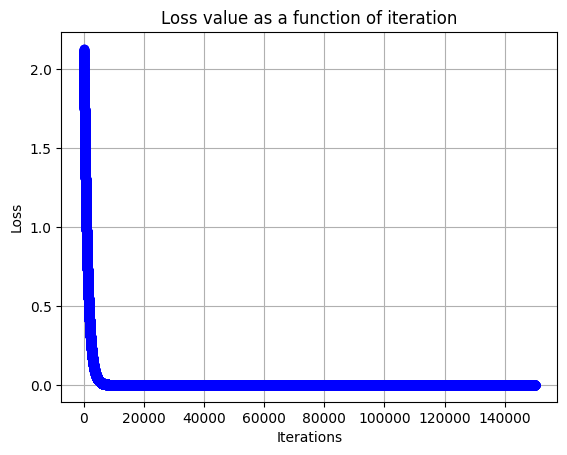

In [6]:
model = LinearRegression(training_features, training_labels , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

plotLineGraph("Iterations", "Loss", "Loss value as a function of iteration",x,values)



#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)
print("Prediction loss", model.calculateMseLoss(ModelEquation(testing_attributes),model.predict(testing_attributes)))

Predicted weights  [[0.79966766]]  bias  0.600392185469777
Prediction loss 4.0293806335451836e-08
